In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from mpl_finance import candlestick_ohlc
import os


# Data Processing


In [9]:
df = pd.read_csv('./TXF20110101_20201231.csv').to_numpy()
idx = -1
data = []
day = ""

# 改一夏
new = df[df[:, 1] == "08:46:00"]

for i in range(5):
    if(i != 0):
        break
    for j, ele in enumerate(df):
        if(int(ele[1][3:5]) % 5 != i or int(ele[1][:2]) > 14 or int(ele[1][:2]) < 8):
            continue
        if(ele[0] != day):
            data.append([[f"{ele[0]}", 0, 0, 0, 0, 0]])
            idx += 1

        data[idx].append(ele[1:])

        data[idx][-1][1] = df[j-4][2]
        data[idx][-1][2] = max(df[j-4][3], df[j-3][3],
                               df[j-2][3], df[j-1][3], df[j][3])
        data[idx][-1][3] = min(df[j-4][4], df[j-3][4],
                               df[j-2][4], df[j-1][4], df[j][4])
        data[idx][-1][4] = df[j][5]
        day = data[idx][0][0]
print(len(data))


flag = 1
while flag:
    for i in range(0, len(data)):
        if len(data[i]) != 61:
            del data[i]
            break
        if i == len(data)-1:
            flag = 0
print(len(data))
data = np.array(data)

print(data.shape, data[1])


2459
2339
(2339, 61, 6) [['2011/01/04' 0 0 0 0 0]
 ['08:50:00' 9030 9030 9021 9027 266]
 ['08:55:00' 9026 9029 9025 9025 112]
 ['09:00:00' 9026 9027 9022 9025 83]
 ['09:05:00' 9024 9025 9015 9021 332]
 ['09:10:00' 9021 9022 9013 9018 204]
 ['09:15:00' 9017 9023 9016 9022 236]
 ['09:20:00' 9022 9024 9018 9020 251]
 ['09:25:00' 9020 9021 9013 9015 121]
 ['09:30:00' 9016 9018 9010 9014 109]
 ['09:35:00' 9014 9017 9008 9010 474]
 ['09:40:00' 9010 9013 9006 9012 75]
 ['09:45:00' 9012 9014 9009 9012 237]
 ['09:50:00' 9013 9015 9011 9015 183]
 ['09:55:00' 9015 9017 9012 9013 133]
 ['10:00:00' 9013 9014 9008 9009 446]
 ['10:05:00' 9009 9010 9006 9008 210]
 ['10:10:00' 9008 9011 9007 9010 231]
 ['10:15:00' 9011 9013 9009 9009 74]
 ['10:20:00' 9011 9016 9008 9015 186]
 ['10:25:00' 9015 9019 9014 9018 191]
 ['10:30:00' 9017 9019 9016 9017 214]
 ['10:35:00' 9017 9018 9016 9017 51]
 ['10:40:00' 9017 9020 9016 9020 441]
 ['10:45:00' 9020 9021 9016 9016 44]
 ['10:50:00' 9017 9019 9016 9018 14]
 ['10:

## 產生照片

### 選擇 10 根

    - 若選擇的tick為前10根，則將前一天的最後幾個街上去

### 之後用 plt 來畫畫


(10, 5)
   time  open close  high   low
0     0  9030  9027  9030  9021
1     1  9026  9025  9029  9025
2     2  9026  9025  9027  9022
3     3  9024  9021  9025  9015
4     4  9021  9018  9022  9013
5     5  9017  9022  9023  9016
6     6  9022  9020  9024  9018
7     7  9020  9015  9021  9013
8     8  9016  9014  9018  9010
9     9  9014  9010  9017  9008


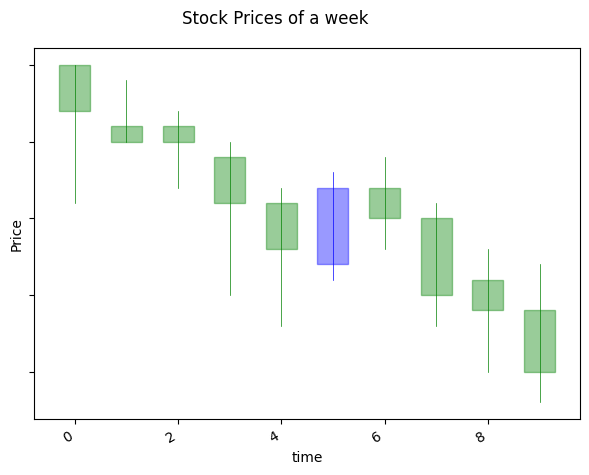

(10, 5)
   time  open close  high   low
0     0  9026  9025  9029  9025
1     1  9026  9025  9027  9022
2     2  9024  9021  9025  9015
3     3  9021  9018  9022  9013
4     4  9017  9022  9023  9016
5     5  9022  9020  9024  9018
6     6  9020  9015  9021  9013
7     7  9016  9014  9018  9010
8     8  9014  9010  9017  9008
9     9  9010  9012  9013  9006


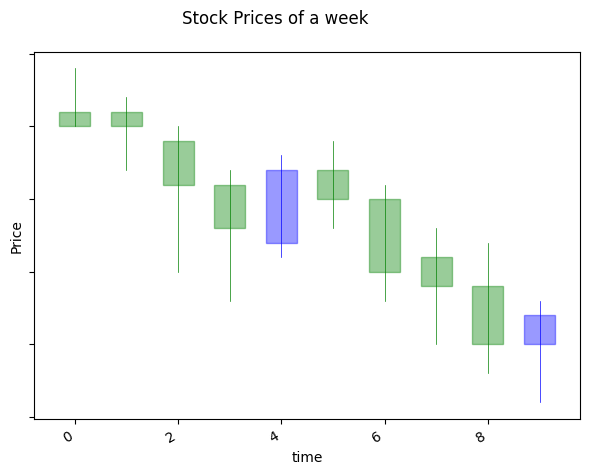

(10, 5)
   time  open close  high   low
0     0  9026  9025  9027  9022
1     1  9024  9021  9025  9015
2     2  9021  9018  9022  9013
3     3  9017  9022  9023  9016
4     4  9022  9020  9024  9018
5     5  9020  9015  9021  9013
6     6  9016  9014  9018  9010
7     7  9014  9010  9017  9008
8     8  9010  9012  9013  9006
9     9  9012  9012  9014  9009


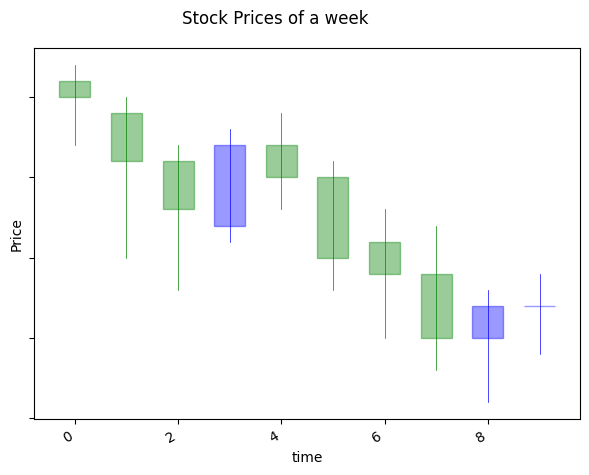

(10, 5)
   time  open close  high   low
0     0  9024  9021  9025  9015
1     1  9021  9018  9022  9013
2     2  9017  9022  9023  9016
3     3  9022  9020  9024  9018
4     4  9020  9015  9021  9013
5     5  9016  9014  9018  9010
6     6  9014  9010  9017  9008
7     7  9010  9012  9013  9006
8     8  9012  9012  9014  9009
9     9  9013  9015  9015  9011


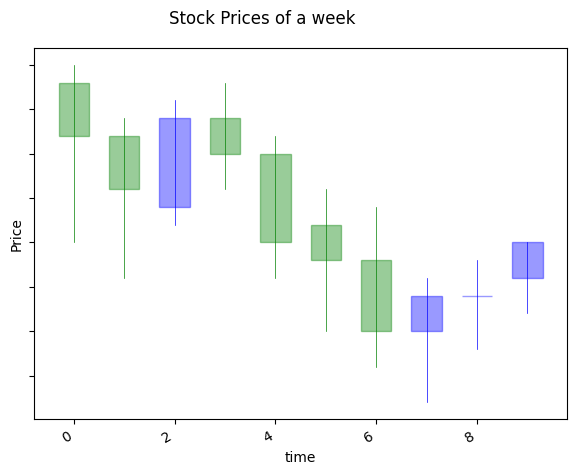

(10, 5)
   time  open close  high   low
0     0  9021  9018  9022  9013
1     1  9017  9022  9023  9016
2     2  9022  9020  9024  9018
3     3  9020  9015  9021  9013
4     4  9016  9014  9018  9010
5     5  9014  9010  9017  9008
6     6  9010  9012  9013  9006
7     7  9012  9012  9014  9009
8     8  9013  9015  9015  9011
9     9  9015  9013  9017  9012


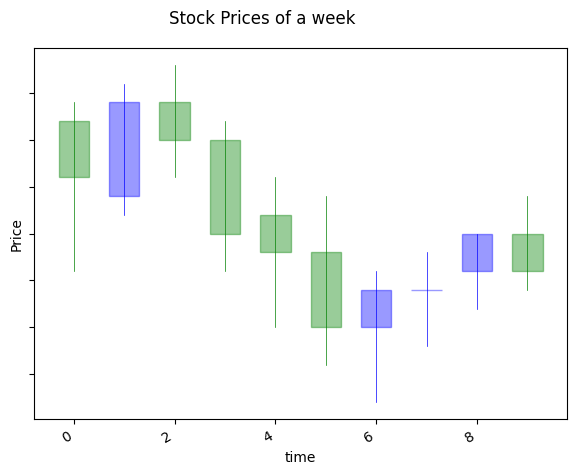

(10, 5)
   time  open close  high   low
0     0  9017  9022  9023  9016
1     1  9022  9020  9024  9018
2     2  9020  9015  9021  9013
3     3  9016  9014  9018  9010
4     4  9014  9010  9017  9008
5     5  9010  9012  9013  9006
6     6  9012  9012  9014  9009
7     7  9013  9015  9015  9011
8     8  9015  9013  9017  9012
9     9  9013  9009  9014  9008


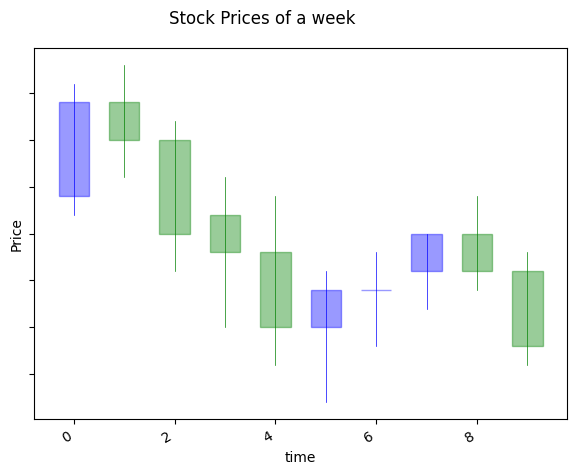

(10, 5)
   time  open close  high   low
0     0  9022  9020  9024  9018
1     1  9020  9015  9021  9013
2     2  9016  9014  9018  9010
3     3  9014  9010  9017  9008
4     4  9010  9012  9013  9006
5     5  9012  9012  9014  9009
6     6  9013  9015  9015  9011
7     7  9015  9013  9017  9012
8     8  9013  9009  9014  9008
9     9  9009  9008  9010  9006


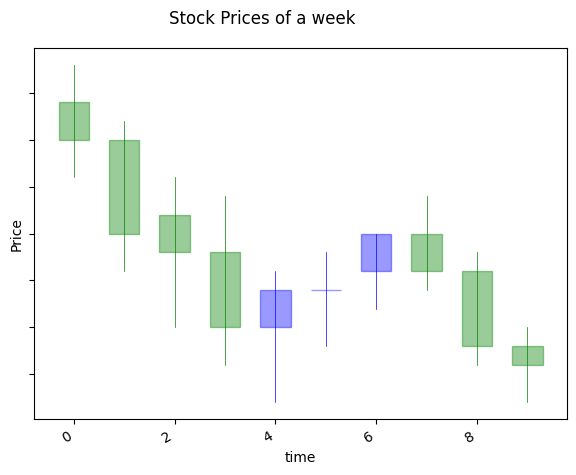

(10, 5)
   time  open close  high   low
0     0  9020  9015  9021  9013
1     1  9016  9014  9018  9010
2     2  9014  9010  9017  9008
3     3  9010  9012  9013  9006
4     4  9012  9012  9014  9009
5     5  9013  9015  9015  9011
6     6  9015  9013  9017  9012
7     7  9013  9009  9014  9008
8     8  9009  9008  9010  9006
9     9  9008  9010  9011  9007


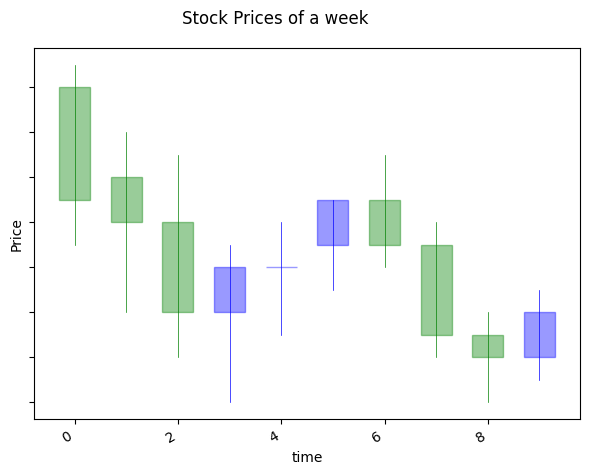

(10, 5)
   time  open close  high   low
0     0  9016  9014  9018  9010
1     1  9014  9010  9017  9008
2     2  9010  9012  9013  9006
3     3  9012  9012  9014  9009
4     4  9013  9015  9015  9011
5     5  9015  9013  9017  9012
6     6  9013  9009  9014  9008
7     7  9009  9008  9010  9006
8     8  9008  9010  9011  9007
9     9  9011  9009  9013  9009


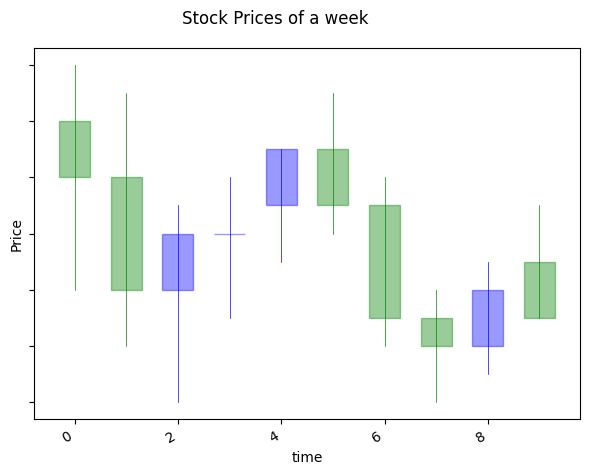

(10, 5)
   time  open close  high   low
0     0  9014  9010  9017  9008
1     1  9010  9012  9013  9006
2     2  9012  9012  9014  9009
3     3  9013  9015  9015  9011
4     4  9015  9013  9017  9012
5     5  9013  9009  9014  9008
6     6  9009  9008  9010  9006
7     7  9008  9010  9011  9007
8     8  9011  9009  9013  9009
9     9  9011  9015  9016  9008


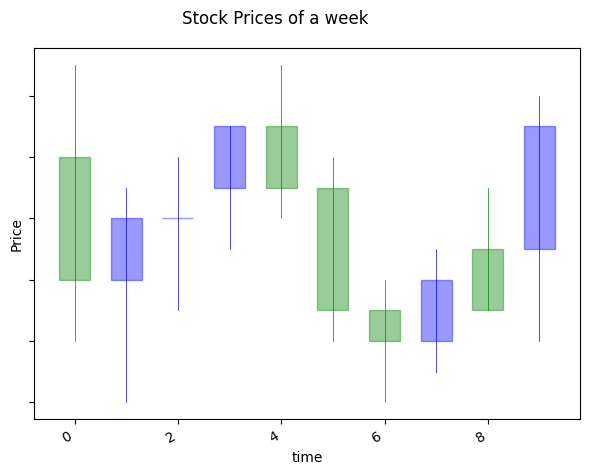

(10, 5)
   time  open close  high   low
0     0  9010  9012  9013  9006
1     1  9012  9012  9014  9009
2     2  9013  9015  9015  9011
3     3  9015  9013  9017  9012
4     4  9013  9009  9014  9008
5     5  9009  9008  9010  9006
6     6  9008  9010  9011  9007
7     7  9011  9009  9013  9009
8     8  9011  9015  9016  9008
9     9  9015  9018  9019  9014


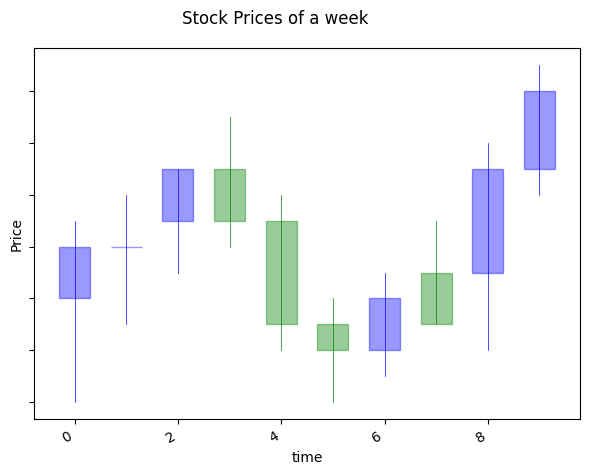

(10, 5)
   time  open close  high   low
0     0  9012  9012  9014  9009
1     1  9013  9015  9015  9011
2     2  9015  9013  9017  9012
3     3  9013  9009  9014  9008
4     4  9009  9008  9010  9006
5     5  9008  9010  9011  9007
6     6  9011  9009  9013  9009
7     7  9011  9015  9016  9008
8     8  9015  9018  9019  9014
9     9  9017  9017  9019  9016


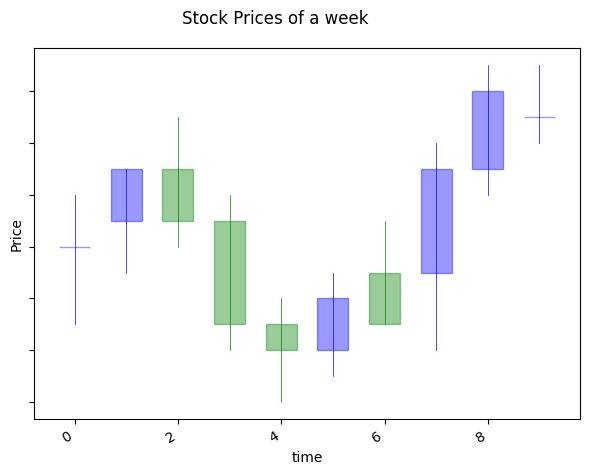

(10, 5)
   time  open close  high   low
0     0  9013  9015  9015  9011
1     1  9015  9013  9017  9012
2     2  9013  9009  9014  9008
3     3  9009  9008  9010  9006
4     4  9008  9010  9011  9007
5     5  9011  9009  9013  9009
6     6  9011  9015  9016  9008
7     7  9015  9018  9019  9014
8     8  9017  9017  9019  9016
9     9  9017  9017  9018  9016


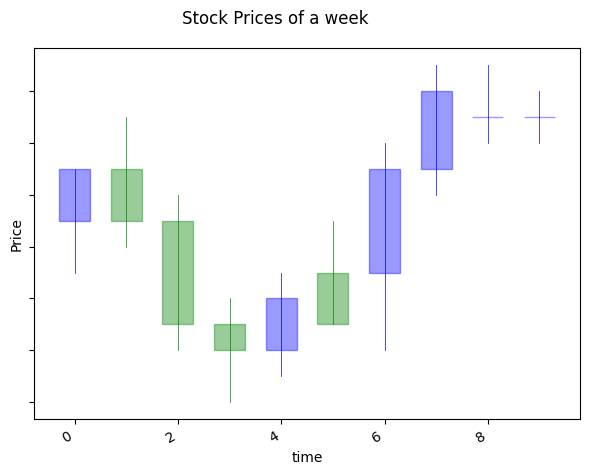

(10, 5)
   time  open close  high   low
0     0  9015  9013  9017  9012
1     1  9013  9009  9014  9008
2     2  9009  9008  9010  9006
3     3  9008  9010  9011  9007
4     4  9011  9009  9013  9009
5     5  9011  9015  9016  9008
6     6  9015  9018  9019  9014
7     7  9017  9017  9019  9016
8     8  9017  9017  9018  9016
9     9  9017  9020  9020  9016


KeyboardInterrupt: 

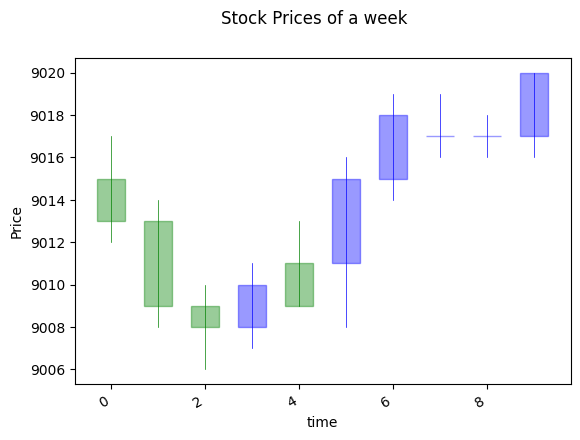

In [23]:
def generatePicsAndLabels():
    # Generate pictures and labels
    # from 1 to len(data)-1
    idx = 0
    for i in range(1, 3):

        for j in range(1, len(data[i])):
            ticks = []  # 10 ticks
            for k in range(0, 10):
                if(j+k < len(data[i])):
                    ticks.append(data[i][j+k][0:5])
                else:
                    lastClose = data[i][-1][4]
                    tick = data[i+1][j+k - len(data[i])+1][0:5]
                    diff = tick[1] - lastClose
                    # every element except for first element in tick add diff
                    tick[1:] = [x + diff for x in tick[1:]]
                    ticks.append(tick)
            ticks = np.array(ticks)
            print(ticks.shape)
            # Defining a dataframe showing stock prices
            # of a week
            stock_prices = pd.DataFrame({'time': np.array([i
                                                           for i in range(10)]),
                                        'open': ticks[:, 1],
                                         'close': ticks[:, 4],
                                         'high': ticks[:, 2],
                                         'low': ticks[:, 3]})

            ohlc = stock_prices.loc[:, [
                'time', 'open', 'high', 'low', 'close']]
            #ohlc['time'] = pd.to_datetime(ohlc['time'])
            #ohlc['time'] = ohlc['time'].apply(mpl_dates.date2num)
            print(stock_prices)
            ohlc = ohlc.astype(float)

            # Creating Subplots
            fig, ax = plt.subplots()

            candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='blue',
                             colordown='green', alpha=0.4)

            # Setting labels & titles
            ax.set_xlabel('time')
            ax.set_ylabel('Price')
            fig.suptitle('Stock Prices of a week')
            # Formatting Date
            #date_format = mpl_dates.DateFormatter('%d-%m-%Y')
            # ax.xaxis.set_major_formatter(date_format)
            fig.autofmt_xdate()

            fig.tight_layout()
            plt.tick_params(axis='y', labelleft=False)
            plt.savefig(f'./pics/{idx}.png', dpi=300, bbox_inches='tight')
            idx += 1
            plt.show()


generatePicsAndLabels()
